# Algoritmo kmeans para clasificación

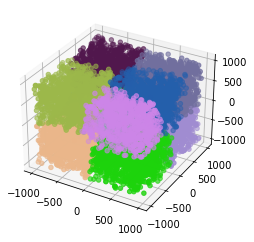

39


In [4]:
import numpy as np
import cv2 as cv
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
np.random.seed(100)
axis_n=3
# img=cv2.imread(r"C:\Users\ASUS\Documents\GitHub\kmeans\satellite_view.png")
# img=cv2.resize(img,(100,100))
# X = img.reshape((-1,3))
# X=np.array(X/1,dtype="uint8")*1
# X.shape
X = np.random.randint(-1000,1000,(10000,axis_n))
Z = np.float32(X)
axis_n1=range(axis_n)#[chr(x) for x in ]
k=10
p_3d=True
if axis_n<3:
    p_3d=False
centros=[]
kmeans=pd.DataFrame(Z,columns=axis_n1)
np.random.seed(10)
centros=np.random.randint(0,255,(k,axis_n))
color=np.random.rand(k,3)
kmeans=pd.DataFrame(Z,columns=axis_n1)
kmeans["menor"]=1e5
kmeans["grupo"]=0
for iteracion in range(40):
    kmeans["menor"]=1e5
    for i,pt in enumerate(centros):
        kmeans["d"+str(i)]=list(np.sqrt(np.sum((centros[i]-Z)**2,axis=1)))
        kmeans.loc[kmeans["d"+str(i)]<=kmeans["menor"],"grupo"]=i
        kmeans.loc[kmeans["d"+str(i)]<=kmeans["menor"],"menor"]=kmeans["d"+str(i)][kmeans["d"+str(i)]<=kmeans["menor"]]
    if p_3d:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
    for i,pt in enumerate(centros):
        if p_3d:
            ax.scatter(kmeans[kmeans["grupo"]==i][axis_n1[0]],kmeans[kmeans["grupo"]==i][axis_n1[1]],kmeans[kmeans["grupo"]==i][axis_n1[2]],c=color[i])
        else:
            plt.scatter(kmeans[kmeans["grupo"]==i][axis_n1[0]],kmeans[kmeans["grupo"]==i][axis_n1[1]],c=color[i])
    centros=[]
    for cp in range(k):
        centros.append(np.array((kmeans[kmeans["grupo"]==cp])[axis_n1].mean()))


    for pt in centros:
        if p_3d:
            ax.scatter(pt[0],pt[1],pt[2],c = 'r')
        else:
            plt.scatter(pt[0],pt[1],c = 'r',marker="x")

    plt.show()
    print(iteracion)
    
    clear_output(wait=True)